## Setting up data

In [1]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 959, done.
remote: Total 959 (delta 0), reused 0 (delta 0), pack-reused 959
Receiving objects: 100% (959/959), 11.69 MiB | 25.14 MiB/s, done.
Resolving deltas: 100% (570/570), done.


In [4]:
!tar -xvzf workspace-1572420406.tar.gz

./
./home/
./home/2_Training.ipynb
./home/.ipynb_checkpoints/
./home/.ipynb_checkpoints/0_Dataset-checkpoint.ipynb
./home/.ipynb_checkpoints/2_Training-checkpoint.ipynb
./home/.ipynb_checkpoints/3_Inference-checkpoint.ipynb
./home/.ipynb_checkpoints/4_Zip Your Project Files and Submit-checkpoint.ipynb
./home/.ipynb_checkpoints/1_Preliminaries-checkpoint.ipynb
./home/0_Dataset.ipynb
./home/model.py
./home/vocabulary.py
./home/4_Zip Your Project Files and Submit.ipynb
./home/images/
./home/images/encoder.png
./home/images/encoder-decoder.png
./home/images/decoder.png
./home/images/download_ex.png
./home/images/coco-examples.jpg
./home/3_Inference.ipynb
./home/1_Preliminaries.ipynb
./home/models/
./home/data_loader.py
./home/filelist.txt


In [0]:
!mv ./home/* .

In [6]:
!wget http://images.cocodataset.org/annotations/image_info_test2014.zip

--2019-11-02 09:11:18--  http://images.cocodataset.org/annotations/image_info_test2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.32.100
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.32.100|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 763464 (746K) [application/zip]
Saving to: ‘image_info_test2014.zip’

image_info_test2014 100%[===================>] 745.57K  4.54MB/s    in 0.2s    

2019-11-02 09:11:18 (4.54 MB/s) - ‘image_info_test2014.zip’ saved [763464/763464]



In [8]:
!unzip image_info_test2014.zip -d cocoapi

Archive:  image_info_test2014.zip
  inflating: cocoapi/annotations/image_info_test2014.json  


In [9]:
!wget http://images.cocodataset.org/zips/test2014.zip

--2019-11-02 09:12:01--  http://images.cocodataset.org/zips/test2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.97.251
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.97.251|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6660437059 (6.2G) [application/zip]
Saving to: ‘test2014.zip’

test2014.zip        100%[===================>]   6.20G  44.4MB/s    in 2m 20s  

2019-11-02 09:14:22 (45.2 MB/s) - ‘test2014.zip’ saved [6660437059/6660437059]



In [0]:
!mkdir ./cocoapi/images

In [0]:
!unzip test2014.zip -d cocoapi/images

# Computer Vision Nanodegree

## Project: Image Captioning

---

In this notebook, you will use your trained model to generate captions for images in the test dataset.

This notebook **will be graded**.  

Feel free to use the links below to navigate the notebook:
- [Step 1](#step1): Get Data Loader for Test Dataset 
- [Step 2](#step2): Load Trained Models
- [Step 3](#step3): Finish the Sampler
- [Step 4](#step4): Clean up Captions
- [Step 5](#step5): Generate Predictions!

<a id='step1'></a>
## Step 1: Get Data Loader for Test Dataset

Before running the code cell below, define the transform in `transform_test` that you would like to use to pre-process the test images.  

Make sure that the transform that you define here agrees with the transform that you used to pre-process the training images (in **2_Training.ipynb**).  For instance, if you normalized the training images, you should also apply the same normalization procedure to the test images.

In [1]:
import sys
sys.path.append('cocoapi/PythonAPI')
from pycocotools.coco import COCO
from data_loader import get_loader
from torchvision import transforms

# TODO #1: Define a transform to pre-process the testing images.
transform_test =  transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

#-#-#-# Do NOT modify the code below this line. #-#-#-#

# Create the data loader.
data_loader = get_loader(transform=transform_test,    
                         mode='test',
                         cocoapi_loc='')

Vocabulary successfully loaded from vocab.pkl file!


Run the code cell below to visualize an example test image, before pre-processing is applied.

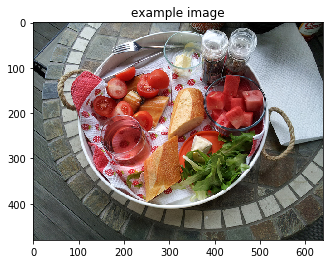

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Obtain sample image before and after pre-processing.
orig_image, image = next(iter(data_loader))

# Visualize sample image, before pre-processing.
plt.imshow(np.squeeze(orig_image))
plt.title('example image')
plt.show()

<a id='step2'></a>
## Step 2: Load Trained Models

In the next code cell we define a `device` that you will use move PyTorch tensors to GPU (if CUDA is available).  Run this code cell before continuing.

In [3]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'cpu'
device

'cpu'

Before running the code cell below, complete the following tasks.

### Task #1

In the next code cell, you will load the trained encoder and decoder from the previous notebook (**2_Training.ipynb**).  To accomplish this, you must specify the names of the saved encoder and decoder files in the `models/` folder (e.g., these names should be `encoder-5.pkl` and `decoder-5.pkl`, if you trained the model for 5 epochs and saved the weights after each epoch).  

### Task #2

Plug in both the embedding size and the size of the hidden layer of the decoder corresponding to the selected pickle file in `decoder_file`.

In [0]:
!mv encoder-3.pkl models/encoder-3.pkl

In [0]:
!mv decoder-3.pkl models/decoder-3.pkl

In [4]:
# Watch for any changes in model.py, and re-load it automatically.
% load_ext autoreload
% autoreload 2

import os
import torch
from model import EncoderCNN, DecoderRNN

# TODO #2: Specify the saved models to load.
encoder_file = 'encoder-3.pkl' 
decoder_file = 'decoder-3.pkl'

# TODO #3: Select appropriate values for the Python variables below.
embed_size = 512
hidden_size = 512

# The size of the vocabulary.
vocab_size = len(data_loader.dataset.vocab)

# Initialize the encoder and decoder, and set each to inference mode.
encoder = EncoderCNN(embed_size)
encoder.eval()
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)
decoder.eval()

# Load the trained weights.
encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

# Move models to GPU if CUDA is available.
encoder.to(device)
decoder.to(device)

DecoderRNN(
  (embedding): Embedding(8855, 512)
  (lstm): LSTM(512, 512, batch_first=True)
  (linear_fc): Linear(in_features=512, out_features=8855, bias=True)
)

<a id='step3'></a>
## Step 3: Finish the Sampler

Before executing the next code cell, you must write the `sample` method in the `DecoderRNN` class in **model.py**.  This method should accept as input a PyTorch tensor `features` containing the embedded input features corresponding to a single image.

It should return as output a Python list `output`, indicating the predicted sentence.  `output[i]` is a nonnegative integer that identifies the predicted `i`-th token in the sentence.  The correspondence between integers and tokens can be explored by examining either `data_loader.dataset.vocab.word2idx` (or `data_loader.dataset.vocab.idx2word`).

After implementing the `sample` method, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.  Do **not** modify the code in the cell below. 

In [5]:
# Move image Pytorch Tensor to GPU if CUDA is available.
image = image.to(device)

# Obtain the embedded image features.
features = encoder(image).unsqueeze(1)

# Pass the embedded image features through the model to get a predicted caption.
output = decoder.sample(features)
print('example output:', output)

assert (type(output)==list), "Output needs to be a Python list" 
assert all([type(x)==int for x in output]), "Output should be a list of integers." 
assert all([x in data_loader.dataset.vocab.idx2word for x in output]), "Each entry in the output needs to correspond to an integer that indicates a token in the vocabulary."

example output: [0, 3, 818, 13, 109, 21, 3, 2558, 6, 3, 3057, 1, 21, 3, 940, 18, 1, 1, 6, 3]


trial run with maxlength=1
```
lstm output shape  torch.Size([1, 1, 512])
lstm output.squeeze(1) shape  torch.Size([1, 512])
linear output shape  torch.Size([1, 8855])
target_index shape  torch.Size([1])
new inputs shape  torch.Size([1, 1, 512]) 

example output: [0]
```

<a id='step4'></a>
## Step 4: Clean up the Captions

In the code cell below, complete the `clean_sentence` function.  It should take a list of integers (corresponding to the variable `output` in **Step 3**) as input and return the corresponding predicted sentence (as a single Python string). 

In [0]:
# TODO #4: Complete the function.
def clean_sentence(output):
    return ' '.join([data_loader.dataset.vocab.idx2word[x] for x in output])

After completing the `clean_sentence` function above, run the code cell below.  If the cell returns an assertion error, then please follow the instructions to modify your code before proceeding.

In [7]:
sentence = clean_sentence(output)
print('example sentence:', sentence)

assert type(sentence)==str, 'Sentence needs to be a Python string!'

example sentence: <start> a plate of food with a salad and a sandwich <end> with a drink . <end> <end> and a


<a id='step5'></a>
## Step 5: Generate Predictions!

In the code cell below, we have written a function (`get_prediction`) that you can use to use to loop over images in the test dataset and print your model's predicted caption.

In [0]:
def get_prediction():
    orig_image, image = next(iter(data_loader))
    plt.imshow(np.squeeze(orig_image))
    plt.title('Sample Image')
    plt.show()
    image = image.to(device)
    features = encoder(image).unsqueeze(1)
    output = decoder.sample(features)    
    sentence = clean_sentence(output)
    print(sentence)

Run the code cell below (multiple times, if you like!) to test how this function works.

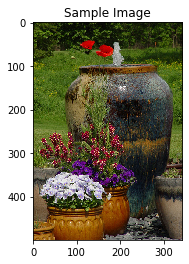

<start> a vase with flowers and a vase of flowers on a table <end> <end> <end> <end> <end> <end> <end>


In [10]:
get_prediction()

As the last task in this project, you will loop over the images until you find four image-caption pairs of interest:
- Two should include image-caption pairs that show instances when the model performed well.
- Two should highlight image-caption pairs that highlight instances where the model did not perform well.

Use the four code cells below to complete this task.

### The model performed well!

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively accurate captions.

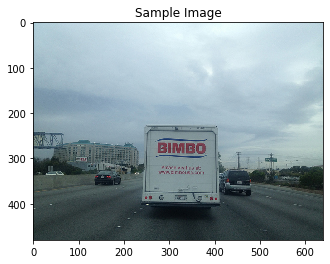

<start> a red and white bus driving down a street . <end> <end> <end> <end> . <end> <end> <end> <end>


In [17]:
get_prediction()

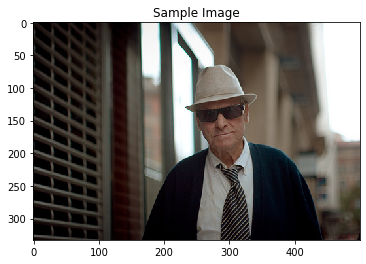

<start> a man in a suit and tie standing in front of a wall . <end> <end> <end> <end> .


In [14]:
get_prediction()

### The model could have performed better ...

Use the next two code cells to loop over captions.  Save the notebook when you encounter two images with relatively inaccurate captions.

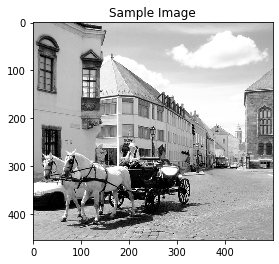

<start> a group of people riding bikes down a street . <end> <end> . <end> <end> <end> <end> . <end>


In [18]:
get_prediction()

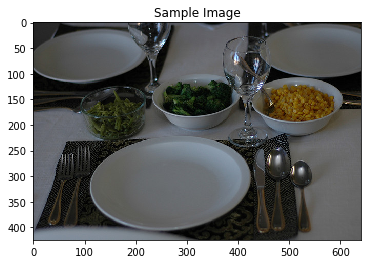

<start> a table with a bowl of soup and a bowl of soup <end> <end> <end> <end> . <end> <end>


In [19]:
get_prediction()

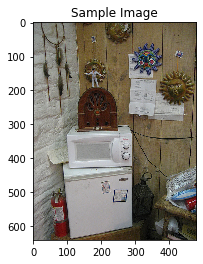

<start> a bathroom with a sink , toilet , and bathtub . <end> <end> <end> <end> <end> <end> <end> .


In [20]:
get_prediction()

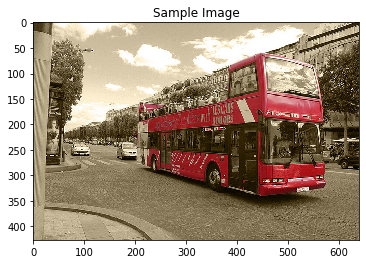

<start> a red and white bus driving down a street . <end> <end> <end> <end> <end> . <end> <end> <end>


In [21]:
get_prediction()

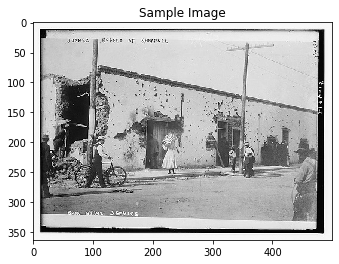

<start> a man in a suit and tie standing in front of a building . <end> <end> <end> . <end>


In [22]:
get_prediction()

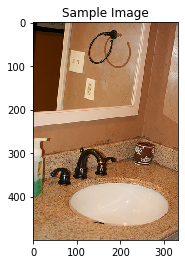

<start> a bathroom with a sink , toilet , and bathtub . <end> <end> <end> <end> <end> <end> . <end>


In [23]:
get_prediction()

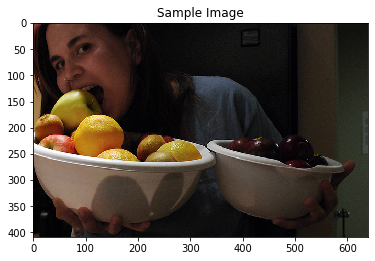

<start> a woman holding a plate of food with a spoon . <end> <end> and a bowl of fruit .


In [24]:
get_prediction()

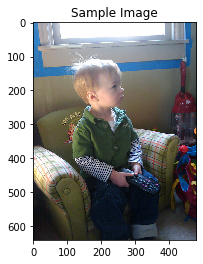

<start> a man sitting on a couch with a laptop computer . <end> <end> . <end> <end> <end> . <end>


In [25]:
get_prediction()

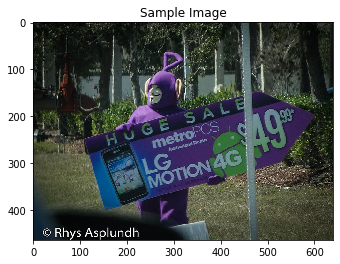

<start> a red fire hydrant sitting on the side of a road . <end> <end> <end> . <end> <end> <end>


In [26]:
get_prediction()

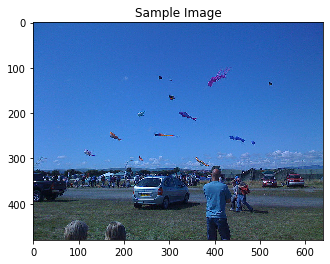

<start> a group of people standing on a beach flying kites . <end> <end> . <end> <end> <end> <end> .


In [27]:
get_prediction()